In [ ]:

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
plt.style.use('default')

In [ ]:
df = web.DataReader('MSFT', data_source='yahoo', start='1986-05-18', end='2021-05-10') 
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1986-05-19,0.111979,0.109375,0.111979,0.110243,11001600.0,0.070021
1986-05-20,0.110243,0.108507,0.110243,0.109375,61977600.0,0.069470
1986-05-21,0.110243,0.107639,0.109375,0.107639,8092800.0,0.068367
1986-05-22,0.108507,0.107639,0.107639,0.107639,4406400.0,0.068367
1986-05-23,0.109375,0.107639,0.107639,0.107639,4089600.0,0.068367
...,...,...,...,...,...,...
2021-05-04,251.210007,245.759995,250.970001,247.789993,32756100.0,247.789993
2021-05-05,249.500000,245.820007,249.059998,246.470001,21901300.0,246.470001
2021-05-06,249.860001,244.690002,246.449997,249.729996,26491100.0,249.729996


In [ ]:
df.shape

(8816, 6)

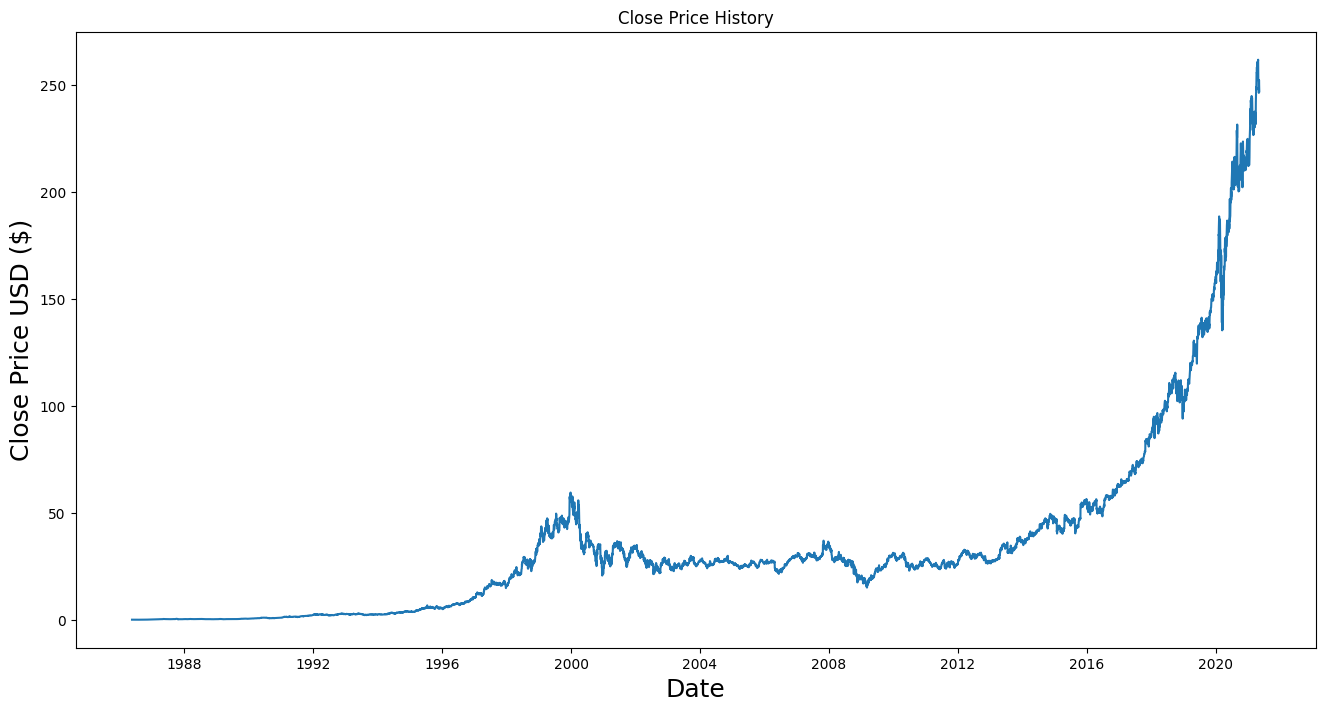

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=12)

Epoch 1/12
219/219 [==============================] - 11s 48ms/step - loss: 4.5089e-06
Epoch 2/12
219/219 [==============================] - 11s 49ms/step - loss: 4.3714e-06
Epoch 3/12
219/219 [==============================] - 11s 48ms/step - loss: 4.4667e-06
Epoch 4/12
219/219 [==============================] - 11s 48ms/step - loss: 4.2874e-06
Epoch 5/12
219/219 [==============================] - 11s 49ms/step - loss: 4.2805e-06
Epoch 6/12
219/219 [==============================] - 11s 49ms/step - loss: 4.7986e-06
Epoch 7/12
219/219 [==============================] - 11s 49ms/step - loss: 4.7161e-06
Epoch 8/12
219/219 [==============================] - 11s 48ms/step - loss: 4.3042e-06
Epoch 9/12
219/219 [==============================] - 11s 48ms/step - loss: 4.3769e-06
Epoch 10/12
219/219 [==============================] - 11s 48ms/step - loss: 4.1371e-06
Epoch 11/12
219/219 [==============================] - 11s 49ms/step - loss: 4.5341e-06
Epoch 12/12
219/219 [====================

In [ ]:
test_data = scaled_data[training_data_len - 60: , : ]

x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [ ]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


15.562413422558224

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


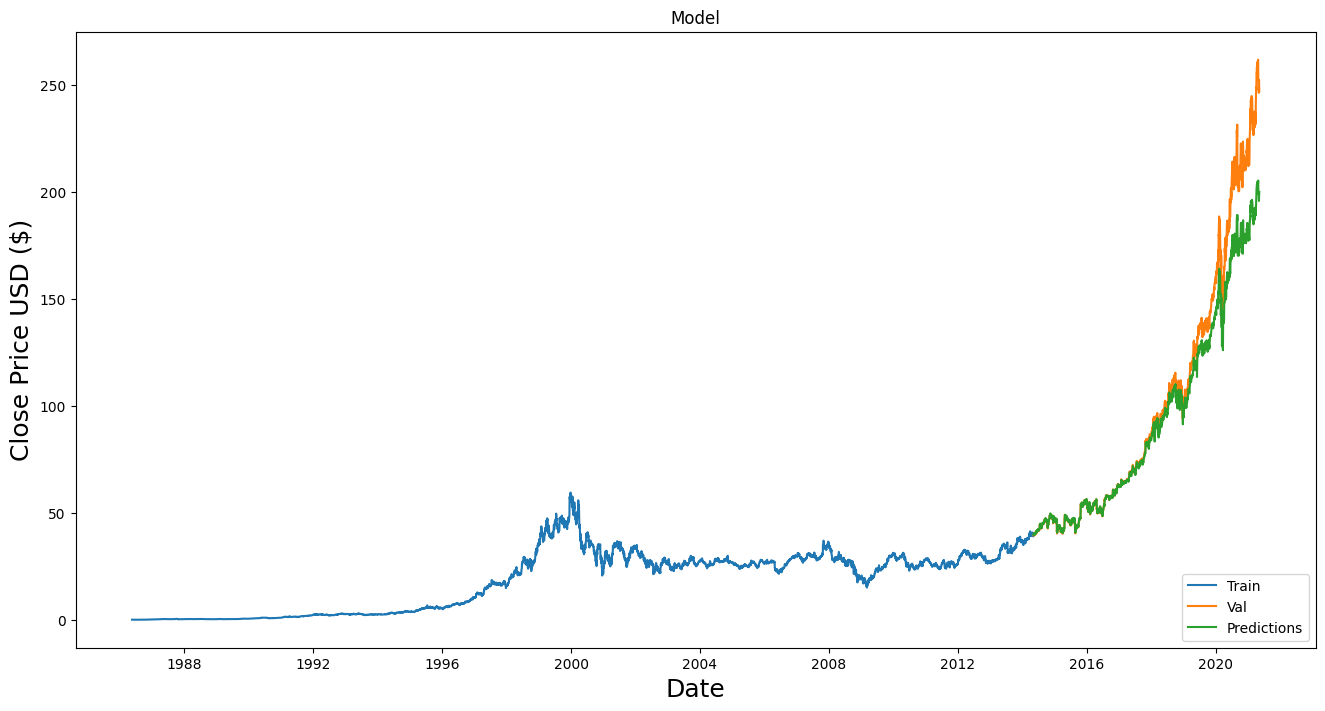

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2018-01-05,1102.229980,1075.994629
2018-01-08,1106.939941,1090.702148
2018-01-09,1106.260010,1094.929565
2018-01-10,1102.609985,1093.566650
2018-01-11,1105.520020,1089.842285
...,...,...
2021-05-04,2354.250000,2350.610840
2021-05-05,2356.739990,2309.161133
2021-05-06,2381.350098,2322.180176


In [ ]:
apple_quote = web.DataReader('GOOG', data_source='yahoo', start='2004-08-20', end='2021-01-07')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[750.27576]]


In [ ]:
apple_quote2 = web.DataReader('GOOG', data_source='yahoo', start='2004-08-20', end='2021-05-10')
print(apple_quote2['Close'])

Date
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
2004-08-26      53.753517
                 ...     
2021-05-04    2354.250000
2021-05-05    2356.739990
2021-05-06    2381.350098
2021-05-07    2398.689941
2021-05-10    2341.659912
Name: Close, Length: 4209, dtype: float64
